# Some Protocols for Fair Division

In [5]:
from problem import Problem
import fairness_measures
import simulations

In [6]:
import simulations_edit
import fairness_measures_edit

Several protocols have been implemented. They can be accessed by importing the module protocols. 

In [7]:
import protocols

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## 4.1 Adjusted Winner

In [9]:
p1 = Problem(3,4,'normalized',centralized=True)
print(p1)

agent 1{'r0': 0.248, 'r1': 0.028, 'r2': 0.372, 'r3': 0.352}
agent 2{'r0': 0.305, 'r1': 0.216, 'r2': 0.29, 'r3': 0.189}



Calcul du ratio $u_h(r)/u_l(r)$ pour chaque objet $r$ que l'on pourrait transférer du *riche* au *pauvre*.

In [10]:
protocols.adjustedWinner(p1,verbose=True)

Output allocation phase:
auctioneer                                  []	
agent  1                       ['r2', 'r3']	0.724
agent  2                       ['r0', 'r1']	0.521

[(1.283, 'r2'), (1.862, 'r3')]
Resource  r2  will be splitted!
Agent  2  gets  0.307  of resource  r2
Both agents get utility: 0.6100300000000001


(0.6100300000000001, 'r2', 2, 0.3066465256797583)

Make sure that you understand exactly why items are allocated this way. 

### Manipulating Adjusted Winner

In [11]:
p2 = Problem(3,2,'uniform',centralized=True)
p2.setUtilities(
[{'r0':0,'r1':0},\
{'r0':75,'r1':25},\
{'r0':25,'r1':75}]
)
print (p2)

agent 1{'r0': 75, 'r1': 25}
agent 2{'r0': 25, 'r1': 75}



In that case, the output of the adjusted winner protocol is rather obvious. Each agent gets its preferred item and everyone enjoys the same utility. 

In [12]:
protocols.adjustedWinner(p2,verbose=True)

Output allocation phase:
auctioneer                                  []	
agent  1                             ['r0']	75
agent  2                             ['r1']	75

[(3.0, 'r1')]


(75, 'r1', 1, 0)

Dans ce cas, les deux agents ont la même utilité **75** sans avoir à se partager un objet. \
(**75** : utilité de chaque agent, **1** : agent 1, **0** : optient 0% de la ressource de l'agent 2)

But can you find a **manipulation** for agent 1, that is, a way to misrepresent the preferences of the agent (in other words, announce a valuation for an item which differs from the real one) such that the utility is in reality higher? 
Note that you will need to compute the allocation with the **declared** preferences, but that the actual utility enjoyed by agents must be computed with their **true** preferences. 

**Manipulation of agent 1 to improve his allocation**

In [13]:
manip_util = [{'r0':0,'r1':0},\
{'r0':26,'r1':74},\
{'r0':25,'r1':75}]

p2_manip = Problem(3,2,'uniform',centralized=True)
p2_manip.setUtilities(manip_util)
print(p2_manip)

agent 1{'r0': 26, 'r1': 74}
agent 2{'r0': 25, 'r1': 75}



La ressource $r_0$ est allouée à l'agent 1 et la ressource $r_1$ à l'agent 2.\
\
Il faut diviser la ressource $r1$ entre l'agent *pauvre* ($a_1$) et l'agent *riche* ($a_2$)  :
$ 26 + 74*p = (1-p) * 75 $

In [14]:
protocols.adjustedWinner(p2_manip,verbose=True)

Output allocation phase:
auctioneer                                  []	
agent  1                             ['r0']	26
agent  2                             ['r1']	75

[(1.014, 'r1')]
Resource  r1  will be splitted!
Agent  1  gets  0.329  of resource  r1
Both agents get utility: 50.346000000000004


(50.346000000000004, 'r1', 1, 0.3288590604026846)

Dans ce cas, les deux agents auront chacun une utilité de 50.35, après que l'agent 1 est mentit sur ses préférences.\
Si on applique cette répartition de la ressource $r1$ sur les vraies utilités annoncées au départ par nos agents, l'utilité finale sera plus haute pour l'agent 1 qui aura mentit.

In [15]:
print("Utilité finale de chacun des agents a")
print("a1 : " + str(round(75 + 0.329 * 25, 3)))
print("a2 : " + str(round((1-0.329)*75, 3)))

Utilité finale de chacun des agents a
a1 : 83.225
a2 : 50.325


What is the "best" manipulation that agent 1 can do? 
To evaluate this, it will be useful to run a script trying all the different values possibly announced by agent 1, and to plot the utility obtained with each of these. 

In [16]:
def total_score(div_):
    return round(75 + div_*25, 3)

Repartition des ressources : 
Output allocation phase:
auctioneer                                  []	
agent  1                             ['r1']	99
agent  2                             ['r0']	25

[(1.32, 'r1')]
Resource  r1  will be splitted!
Agent  2  gets  0.425  of resource  r1
Both agents get utility: 56.875

L'agent 2 est pauvre.
L'agent 1 doit donner 0.42528735632183906 de r1 à l'agent 2
True utility get by agent 1 after lying on his preferences : 
14.368

Repartition des ressources : 
Output allocation phase:
auctioneer                                  []	
agent  1                             ['r1']	98
agent  2                             ['r0']	25

[(1.307, 'r1')]
Resource  r1  will be splitted!
Agent  2  gets  0.422  of resource  r1
Both agents get utility: 56.65

L'agent 2 est pauvre.
L'agent 1 doit donner 0.42196531791907516 de r1 à l'agent 2
True utility get by agent 1 after lying on his preferences : 
14.451

Repartition des ressources : 
Output allocation phase:
auction

Output allocation phase:
auctioneer                                  []	
agent  1                             ['r0']	87
agent  2                             ['r1']	75

[(3.48, 'r0')]
Resource  r0  will be splitted!
Agent  2  gets  0.107  of resource  r0
Both agents get utility: 77.675

L'agent 2 est pauvre.
L'agent 1 doit donner 0.10714285714285714 de r0 à l'agent 2
True utility get by agent 1 after lying on his preferences : 
66.964

Repartition des ressources : 
Output allocation phase:
auctioneer                                  []	
agent  1                             ['r0']	88
agent  2                             ['r1']	75

[(3.52, 'r0')]
Resource  r0  will be splitted!
Agent  2  gets  0.115  of resource  r0
Both agents get utility: 77.875

L'agent 2 est pauvre.
L'agent 1 doit donner 0.11504424778761062 de r0 à l'agent 2
True utility get by agent 1 after lying on his preferences : 
66.372

Repartition des ressources : 
Output allocation phase:
auctioneer                           

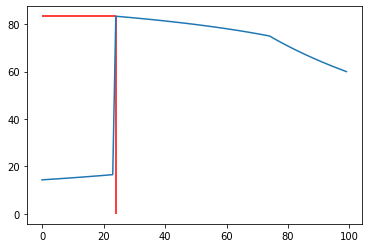

In [17]:

y = []
for i in range(100):
    p2_plot = Problem(3,2,'uniform',centralized=True)
    util_ = [{'r0':0,'r1':0},\
            {'r0':i+1,'r1':(100-i-1)},\
            {'r0':25,'r1':75}]
    p2_plot.setUtilities(util_)
    print("Repartition des ressources : ")
    u, r, low, part_of_low = protocols.adjustedWinner(p2_plot,verbose=True)
    
    if low == 2:
        #cas où l'agent 1 est riche
        print("\nL'agent 2 est pauvre.")
        
        
        if r=='r0':
            print("L'agent 1 doit donner "+str(part_of_low)+" de "+r+" à l'agent 2")
            print("True utility get by agent 1 after lying on his preferences : ")
            true_utility = round(75*(1-part_of_low), 3)
            print(str(true_utility)+"\n")
            y.append(true_utility)
        
        else:
            print("L'agent 1 doit donner "+str(part_of_low)+" de "+r+" à l'agent 2")
            print("True utility get by agent 1 after lying on his preferences : ")
            true_utility = (round(25*(1-part_of_low), 3))
            print(str(true_utility)+"\n")
            y.append(true_utility)
        
    else:
        #cas où l'agent 1 est pauvre
        print("\nL'agent 1 est pauvre.")

        if r=='r0':
            print("L'agent 2 doit donner "+str(part_of_low)+" de "+r+" à l'agent 2")
            print("True utility get by agent 1 after lying on his preferences : ")
            true_utility = total_score(part_of_low)
            print(str(true_utility)+"\n")
            y.append(true_utility)
        
        else:

            print("L'agent 2 doit donner "+str(part_of_low)+" de "+r+" à l'agent 2")
            print("True utility get by agent 1 after lying on his preferences : ")
            true_utility = total_score(part_of_low)
            print(str(true_utility)+"\n")
            y.append(true_utility) 
    
x = np.arange(100)
y = np.array(y)
xmax = x[np.argmax(y)]
ymax = y[np.argmax(y)]
plt.vlines(x=xmax, ymin=0, ymax=ymax, color='red')
plt.hlines(xmin=0, xmax=xmax, y=ymax, color='red')
plt.plot(x,y)

## 4. 2 Picking Sequences

In [18]:
p3 = Problem(4,6,'empty', centralized=True)
p3.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':7,'r5':2},\
{'r0':2,'r1':6,'r2':8,'r3':1,'r4':1,'r5':2},\
{'r0':5,'r1':4,'r2':4,'r3':3,'r4':2,'r5':2}]
)
print (p3)
print (p3.printAllocation())

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 7, 'r5': 2}
agent 2{'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1, 'r4': 1, 'r5': 2}
agent 3{'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3, 'r4': 2, 'r5': 2}

auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0



Let us apply a picking sequence on our problem p3.

In [19]:
s0 = [1,2,3,2,3,1]
protocols.pickingSequence(p3,s0,verbose=True)

agent  1  picks  r4
agent  2  picks  r2
agent  3  picks  r0
agent  2  picks  r1
agent  3  picks  r3
agent  1  picks  r5


In [20]:
print(p3.printAllocation())

auctioneer                                  []	
agent  1                       ['r4', 'r5']	 9
agent  2                       ['r2', 'r1']	14
agent  3                       ['r0', 'r3']	 8



In [21]:
print(fairness_measures.envyMatrix(p3))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


It is also possible to generate standard sequences, like balanced or alternate ones. 

In [22]:
s= protocols.generateSequence(3,6,'balanced')
print(s)

[1, 2, 3, 3, 2, 1]


### What is the fairest picking sequence?

Let us consider 3 agents and 5 items. Can you propose some sequence which would do well in terms of egalitarian social welfare? You can simulate a number of picking sequences by specifying: the number of experiments, the number of agents (remember to count agent 0 here-to be fixed sorry), the number of objects, the sequence, and the ways utilities are generated.
    

In [23]:
import simulations_edit
import fairness_measures_edit

In [24]:
print(p3)

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 7, 'r5': 2}
agent 2{'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1, 'r4': 1, 'r5': 2}
agent 3{'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3, 'r4': 2, 'r5': 2}



### Sequence which would do well in terms of egalitarian social welfare
Maximise the average egalitarian sw

#### sequence aléatoire : $[1,1,2,2,3]$

In [25]:
simulations.simulationPickingSequences(1000,4,5,[1,1,2,2,3],'borda',verbose=False) # to start with a bad sequence

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                 2.988
= Ratio of proportional:                0.189
= Ratio of envy free:                    0.052
= Average number of envious:             1.127
= Average max envy:                      4.434
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



In [30]:
a,_ = simulations_edit.simulationPickingSequences(1000,4,5,[1,1,2,2,3],'borda',verbose=False) # to start with a bad sequence
print(a)

3.11


#### Séquence basée sur les 5 premiers objets **non-attribué** d'utilitée maximale :
$$u_2(r_2) > u_1(r_4) > u_2(r_1) > u_3(r_0) > u_3(r_3)$$

In [32]:
a, _ = simulations_edit.simulationPickingSequences(1000,4,5,[2,1,2,3,3],'borda',verbose=False) # to start with a bad sequence
a

4.528

Répartition des objets de façon plus équitable car chaque objet est attribué à l'agent pour lequel l'utilité est maximale. On minimise donc l'utilité maximale de chaque bjet attribué aux agents.\
Le bien-être social moyen augmente donc.

#### Séquence de tirage pseudo équitable : 
On tente de donner un nombre équitable de tirage à tous les agents.

In [39]:
print("Sequence : [1,2,3,2,1] : ", simulations_edit.simulationPickingSequences(1000,4,5,[1,2,3,2,1],'borda',verbose=False)[0])
print("Sequence : [1,2,3,1,2] : ", simulations_edit.simulationPickingSequences(1000,4,5,[1,2,3,1,2],'borda',verbose=False)[0])

Sequence : [1,2,3,2,1] :  4.518
Sequence : [1,2,3,1,2] :  4.517


In [42]:
print("Sequence : [3,2,1,2,3] : ", simulations_edit.simulationPickingSequences(1000,4,5,[3,2,1,2,3],'borda',verbose=False)[0])
print("Sequence : [3,2,1,3,2] : ", simulations_edit.simulationPickingSequences(1000,4,5,[3,2,1,3,2],'borda',verbose=False)[0])

Sequence : [3,2,1,2,3] :  4.483
Sequence : [3,2,1,3,2] :  4.504


### And to conclude: 
For 3 agents, and 6 and 8 objects, could you find the fairest picking sequences in terms of: 
* egalitarian social welfare
* average max envy

On cherche à maximiser le bien-être social moyen et à minimiser l'envie maximale.

In [14]:
simulations.simulationPickingSequences(1000,4,6,[1,1,3,2,2,3],'borda',verbose=False) # to start with a bad sequence

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                 7.581
= Ratio of proportional:                0.796
= Ratio of envy free:                    0.476
= Average number of envious:             0.615
= Average max envy:                      1.507
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



In [60]:
print("Average Egalitarian SW & Average Max Envy")
simulations_edit.simulationPickingSequences(1000,4,6,[1,1,3,2,2,3],'borda',verbose=False) # to start with a bad sequence

Average Egalitarian SW & Average Max Envy


(7.555, 1.537)

In [57]:
print(p3)

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 7, 'r5': 2}
agent 2{'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1, 'r4': 1, 'r5': 2}
agent 3{'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3, 'r4': 2, 'r5': 2}



#### Séquence basée sur les 6 premiers objets **non-attribué** d'utilitée maximale :
$$u_2(r_2) > u_1(r_4) > u_2(r_1) > u_3(r_0) > u_3(r_3) > (u_3(r_5) =  u_2(r_5) = u_1(r_5))  $$

In [61]:
print("Average Egalitarian SW & Average Max Envy")
simulations_edit.simulationPickingSequences(1000,4,6,[2,1,2,3,3,3],'borda',verbose=False)

Average Egalitarian SW & Average Max Envy


(5.83, 3.527)

In [62]:
print("Average Egalitarian SW & Average Max Envy")
simulations_edit.simulationPickingSequences(1000,4,6,[2,1,2,3,3,2],'borda',verbose=False)

Average Egalitarian SW & Average Max Envy


(5.82, 4.073)

In [63]:
print("Average Egalitarian SW & Average Max Envy")
simulations_edit.simulationPickingSequences(1000,4,6,[2,1,2,3,3,1],'borda',verbose=False)

Average Egalitarian SW & Average Max Envy


(7.838, 1.073)

Sur la dernière séquence $[2,1,2,3,3,1]$, l'envie maximale diminue car l'agent, qui auparavant avait moins d'objet que les 2 autres agents récupère le dernier objet $r_6$. Ainsi les utilités entre agents sont équilibrées et l'envie moyenne des agents diminue aussi.

#### Séquence de tirage pseudo équitable : 
On tente de donner un nombre équitable de tirage à tous les agents.

In [64]:
print("Average Egalitarian SW & Average Max Envy")
simulations_edit.simulationPickingSequences(1000,4,6,[1,2,3,1,2,3],'borda',verbose=False)

(8.01, 0.808)

In [65]:
simulations_edit.simulationPickingSequences(1000,4,6,[1,2,3,2,1,3],'borda',verbose=False)

(8.059, 0.731)

In [66]:
simulations_edit.simulationPickingSequences(1000,4,6,[1,2,3,3,2,1],'borda',verbose=False)


(8.255, 0.363)

## 4.3 Lipton et al. protocol

Let us now test the protocol of Lipton, which allocates items one by one and solves envy cycles when they occur. 

In [15]:
p4 = Problem(4,6,'empty','centralized')
print(p4)
print(p4.printAllocation())
p4.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':7,'r5':2},\
{'r0':2,'r1':6,'r2':8,'r3':1,'r4':1,'r5':2},\
{'r0':5,'r1':4,'r2':4,'r3':3,'r4':2,'r5':2}]
)
print(p4)

protocols.lipton(p4)

agent 1{'r0': 0, 'r1': 0, 'r2': 0, 'r3': 0, 'r4': 0, 'r5': 0}
agent 2{'r0': 0, 'r1': 0, 'r2': 0, 'r3': 0, 'r4': 0, 'r5': 0}
agent 3{'r0': 0, 'r1': 0, 'r2': 0, 'r3': 0, 'r4': 0, 'r5': 0}

auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 7, 'r5': 2}
agent 2{'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1, 'r4': 1, 'r5': 2}
agent 3{'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3, 'r4': 2, 'r5': 2}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Running the Lipton et al. protocol
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0

envy graph: {0: [], 1: [], 2: [], 3: []}
allocating resource  r0
auctioneer      ['r1', 'r2', 'r3', 'r4',

## 4.4 Local deals

Finally, let us play a bit with local exchanges. For this, we will need to create a decentralized MARA problem. Items are intially allocated at random among agents. Here, utilities are Borda. 

In [16]:
p5 = Problem(4,6,'borda',centralized=False)
print(p5)
print(p5.printAllocation())


agent 0{'r0': 4, 'r1': 5, 'r2': 2, 'r3': 6, 'r4': 1, 'r5': 3}
agent 1{'r0': 6, 'r1': 2, 'r2': 5, 'r3': 4, 'r4': 3, 'r5': 1}
agent 2{'r0': 5, 'r1': 6, 'r2': 1, 'r3': 4, 'r4': 2, 'r5': 3}
agent 3{'r0': 5, 'r1': 2, 'r2': 4, 'r3': 1, 'r4': 3, 'r5': 6}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                             ['r4']	 1
agent  1                             ['r1']	 2
agent  2                       ['r2', 'r3']	 5
agent  3                       ['r0', 'r5']	11



Can you spot which agents could perform mutually beneficial deals? 

In [17]:
protocols.randomDynamics(p5,True)

agent  0  meets agent  1
deal between  0  and  1 for  r4  and  r1
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                             ['r1']	 5
agent  1                             ['r4']	 3
agent  2                       ['r2', 'r3']	 5
agent  3                       ['r0', 'r5']	11

agent  0  meets agent  1
agent  0  meets agent  3
agent  1  meets agent  2
deal between  1  and  2 for  r4  and  r2
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                             ['r1']	 5
agent  1                             ['r2']	 5
agent  2                       ['r3', 'r4']	 6
agent  3                       ['r0', 'r5']	11

agent  1  meets agent  2
agent  1  meets agent  3
agent  0  meets agent  1
agent  0  meets agent  3
agent  2  meets agent  3
agent  0  meets agent  2
deal between  0  and  2 for  r1  and  r3
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                             ['r3']	 6
agent  1                             ['r2']	 5

Let us check the envy of the final allocation. 

In [20]:
m = fairness_measures.envyMatrix(p5)
g = fairness_measures.buildEnvyGraph(m)
print (g)

{0: [3], 1: [3], 2: [], 3: []}


### Could you find fairer dynamics?

As it stands, agents just meet randomly (a given pair is picked uniformly among the possible ones). 
Could you conceive a fairer dynamics and test it? 

### References

* The discussion and example about Adjusted Winner Manipulation is taken from a video by Eric Pacuit: 
https://www.youtube.com/watch?v=RtcnSXL69NQ

* See (Bouveret and Lang, IJCAI-11) for more details about picking sequences. 

Notebook last updated 2020-01-06